##Imports


In [ ]:
from PIL import Image
import pandas as np
import numpy as np
import cv2
import matplotlib.pyplot as plt
import dlib
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Carregamento da base de dados

In [ ]:
import zipfile
#Nosso arquivo yalefaces, está zipado, então teremos que usar o zipfile para ler esse arquivo, logo após gerar uma pasta com os arquivos contidos dentro de yalefaces
#Diretório onde se encontra o aquivo 'yalefaces.zip' no drive, que já foi importado para o colab
yalefaces = '/content/drive/MyDrive/M5/Visão Computacional Guia Completo-20220707T140129Z-001/Visão Computacional Guia Completo/Datasets/yalefaces.zip'
#aqui nos definimos o arquivo a ser visto e como ele vai ser visto, no caso poderiamos por um w para escrever o arquivo, mas estamos usando o R por que ja temos informações dentro do yalefaces.
yalefaces_zip = zipfile.ZipFile(file=yalefaces, mode = 'r')
yalefaces_zip.extractall('./')
yalefaces_zip.close()

##Pré-Processamento das imagens 

In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))
#gifs dentro da pasta train

['subject11.leftlight.gif', 'subject07.normal.gif', 'subject02.wink.gif', 'subject03.sleepy.gif', 'subject13.leftlight.gif', 'subject04.wink.gif', 'subject14.surprised.gif', 'subject02.glasses.gif', 'subject07.sad.gif', 'subject10.noglasses.gif', 'subject11.wink.gif', 'subject01.sad.gif', 'subject12.sleepy.gif', 'subject04.normal.gif', 'subject02.rightlight.gif', 'subject04.sleepy.gif', 'subject05.centerlight.gif', 'subject01.leftlight.gif', 'subject13.wink.gif', 'subject07.sleepy.gif', 'subject15.noglasses.gif', 'subject13.happy.gif', 'subject14.happy.gif', 'subject11.rightlight.gif', 'subject08.surprised.gif', 'subject02.normal.gif', 'subject07.noglasses.gif', 'subject02.happy.gif', 'subject09.sleepy.gif', 'subject04.happy.gif', 'subject01.noglasses.gif', 'subject13.normal.gif', 'subject03.wink.gif', 'subject06.rightlight.gif', 'subject04.centerlight.gif', 'subject06.noglasses.gif', 'subject01.glasses.gif', 'subject12.noglasses.gif', 'subject15.sleepy.gif', 'subject11.sad.gif', 'subj

In [ ]:
print(os.listdir('/content/yalefaces/test'))
#gifs dentro da pasta test

['subject05.surprised.gif', 'subject12.rightlight.gif', 'subject11.glasses.gif', 'subject02.centerlight.gif', 'subject08.normal.gif', 'subject07.leftlight.gif', 'subject08.rightlight.gif', 'subject10.centerlight.gif', 'subject02.leftlight.gif', 'subject14.normal.gif', 'subject04.leftlight.gif', 'subject06.leftlight.gif', 'subject14.sad.gif', 'subject15.sad.gif', 'subject13.sad.gif', 'subject05.sleepy.gif', 'subject10.sad.gif', 'subject01.happy.gif', 'subject03.leftlight.gif', 'subject01.gif', 'subject09.rightlight.gif', 'subject03.glasses.gif', 'subject07.happy.gif', 'subject11.happy.gif', 'subject13.sleepy.gif', 'subject09.sad.gif', 'subject12.normal.gif', 'subject15.rightlight.gif', 'subject04.surprised.gif', 'subject06.happy.gif']


In [ ]:
def get_img_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  #Pega o que está dentro da pasta train
  faces = [] #define lista para faces
  ids = []   #define lista para ids


  #for para facilitar a transformação de todos os dados de uma vez.
  for path in paths:
    #print(path)
    img = Image.open(path).convert('L') #abre a imagem e converte para 'L', que são os tons cinzas.
    #print(type(img))
    img_np = np.array(img, 'uint8')     #transforma a imagem cinza em uma array numpy, uint8 é o tipo de matriz
    #print(img_np)
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))#aqui só separaremos o nome da imagem do numero, e transformaremos em um inteiro, para ser nosso EXP
    print(id)                                                            #por exemplo subject90, apos separar e transformaremos, obteremos o somente o numero 90
    ids.append(id)      #adicionando cada id a lista de ids
    faces.append(img_np)#adicionando cada face a lista de faces

  return np.array(ids), faces #retornando as variaveis para podermos usar elas fora da função

In [ ]:
ids, faces = get_img_data()

11
7
2
3
13
4
14
2
7
10
11
1
12
4
2
4
5
1
13
7
15
13
14
11
8
2
7
2
9
4
1
13
3
6
4
6
1
12
15
11
12
9
6
3
4
14
2
6
3
5
8
13
15
3
14
2
7
13
4
10
9
13
14
5
8
13
7
12
5
1
4
5
1
9
2
1
7
6
14
9
8
10
10
11
14
9
6
9
7
5
9
15
3
8
8
5
2
13
4
3
3
14
1
15
11
6
15
10
3
10
8
15
9
12
7
12
5
12
8
6
8
1
15
12
10
5
10
10
6
15
12
11
14
11
11


In [ ]:
#prints para mostrar quais são as ids, a quantidade de ids, a primeira id e a ultima id.
print(f'Ids = {ids}\n\nQtde = {len(ids)}\n\nPrimeiro = {ids[0]}\n\nUltimo = {ids[134]}')

Ids = [11  7  2  3 13  4 14  2  7 10 11  1 12  4  2  4  5  1 13  7 15 13 14 11
  8  2  7  2  9  4  1 13  3  6  4  6  1 12 15 11 12  9  6  3  4 14  2  6
  3  5  8 13 15  3 14  2  7 13  4 10  9 13 14  5  8 13  7 12  5  1  4  5
  1  9  2  1  7  6 14  9  8 10 10 11 14  9  6  9  7  5  9 15  3  8  8  5
  2 13  4  3  3 14  1 15 11  6 15 10  3 10  8 15  9 12  7 12  5 12  8  6
  8  1 15 12 10  5 10 10  6 15 12 11 14 11 11]

Qtde = 135

Primeiro = 11

Ultimo = 11


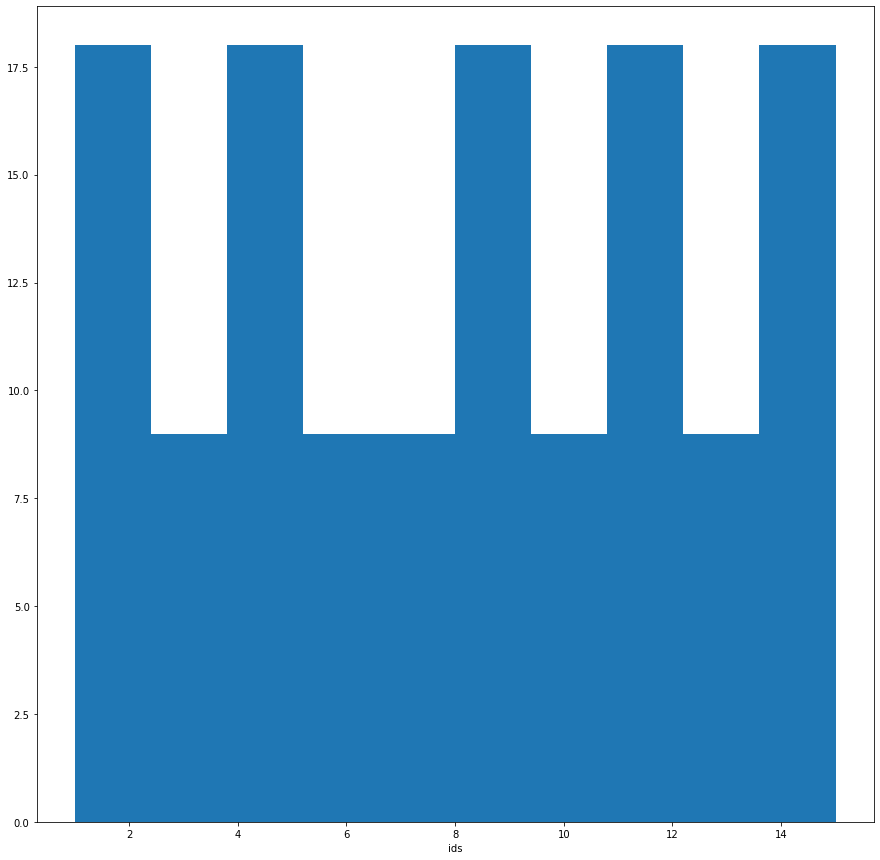

In [ ]:
#a partir das informações contidas na lista ids, gerei um histográfico
plt.figure(figsize = (15, 15))
plt.hist(ids)
plt.xlabel('ids');

In [ ]:
#printei oq havia dentro da array faces, mostrei a quantidade de arrays que havia em faces, mostrei a primeira e a ultima face.
print(f'faces = {faces}\n\nQtde = {len(faces)}\n\nPrimeiro = {faces[0]}\n\nUltimo = {faces[134]}')

faces = [array([[130, 129, 121, ..., 190, 182, 185],
       [255, 255, 255, ..., 183, 183, 192],
       [255, 255, 255, ..., 175, 185, 209],
       ...,
       [161, 164, 161, ...,  47,  48,  50],
       [163, 164, 161, ...,  50,  44,  43],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[110, 114, 125, ..., 255, 255, 242],
       [238, 241, 255, ..., 255, 255, 249],
       [253, 255, 255, ..., 255, 252, 244],
       ...,
       [255, 255, 255, ..., 186, 182, 182],
       [255, 255, 255, ..., 182, 178, 175],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 25

In [ ]:
faces[0].shape

(243, 320)

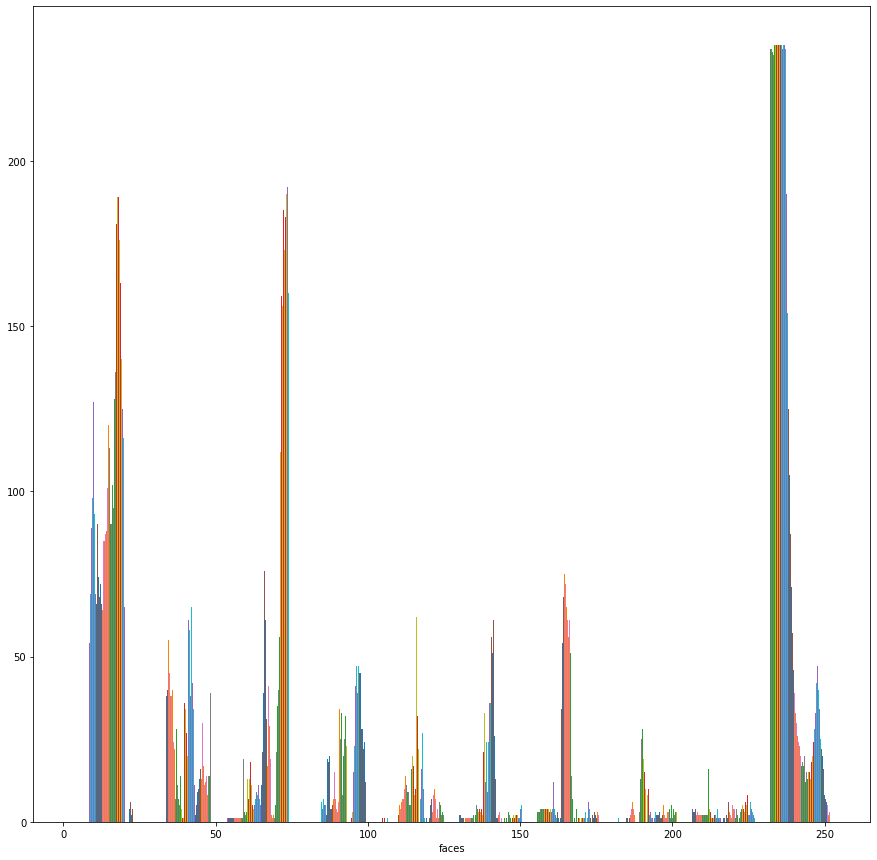

In [ ]:
#Aqui gerei um histográfico que ficou bem grande, devido ao número elevado de informações que existem em somente uma array
#no caso essa é a primeira.(0)
plt.figure(figsize = (15,15))
plt.hist(faces[0])
plt.xlabel('faces');


##treinamento do classificador

In [ ]:
classificador = cv2.face.LBPHFaceRecognizer_create(	radius = 10,
neighbors = 12,
grid_x = 12,
grid_y = 12) #Comando usado para fazer reconhecimento facial a partir de padrões binários locais.
classificador.train(faces, ids)                      #Vamos treinar faces e ids
classificador.write('Classificador_yaleface.yml')    #Estamos gerando o arquivo ''Classificador_yaleface.yml''

In [ ]:
classificador_face = '/content/Classificador_yaleface.yml'   #classificador_yale recebe o diretório de classificador_yaleface.yml

imagem_teste = '/content/yalefaces/test/subject13.sleepy.gif'#imagem_teste recebe subject13
imagem_cinza = Image.open(imagem_teste).convert('L')         #abrimos a imagem_teste e a convertemos para uma escala de cinza.  
imagem_np = np.array(imagem_cinza, 'uint8')                  #transformamos a imagem_cinza em uma matriz do tipo uint8(uma array)
id_imagem = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))  #separamos o nome do numero e transformamos para inteiro
                                                                                      # por exemplo subject13, ficaria somente 13 ja convertido para inteiro.

In [ ]:
#Aqui estaremos fazendo uma previsão, ou seja, um teste com a imagem, para ser ver a o programa reconhece a imagem.
previsao = classificador.predict(imagem_np)

previsao

(13, 78.20304163721791)

In [ ]:
cv2.putText(imagem_np, 'pred:' + str(previsao[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,255)) #definicão da legende, local da legenda, fonte da legenda e a cor.
cv2.putText(imagem_np, 'Exp:' + str(id_imagem), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,255))    #definicão da legende, local da legenda, fonte da legenda e a cor

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 196, 188, 192],
       [255, 255, 255, ..., 214, 208, 208],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

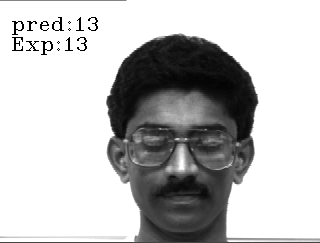

In [ ]:
cv2_imshow(imagem_np) #imagem, com a previsão e a experiencia. que no caso está certo, por que os resultados batem.

##Avaliação do classificador

In [ ]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
#usando o os abrimos o local onde esta as imagens de teste.
#usando o listdir vizualizaremos o que há dentro da pasta
previsoes = [] #Criamos uma lista chaamada de previsoes, para armazenar os resultados que seram gerados a apartida do predict              
esperados = [] #Na lista armazenaremos valores que estão certos.
for path in paths:#faremos um for para automatizar as conversões
  #print(path)
  imagem = Image.open(path).convert('L') #para imagem cinza.
  imagem_np = np.array(imagem, 'uint8')  #para 7uma matriz do tipo uint8
  previsao, _ = classificador.predict(imagem_np) #fazendo o teste dessas imagens.
  esperado = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  
  previsoes.append(previsao) #adicionando cada informação a cada lista
  esperados.append(esperado) 

In [ ]:
np.array(previsoes)

array([ 5, 12, 11,  4,  8,  9,  4,  4,  2, 14,  4, 14, 14, 15, 13,  5, 10,
        1,  3,  1,  7,  3,  7, 11, 13,  9, 12,  7,  4,  6])

In [ ]:
np.array(esperados)

array([ 5, 12, 11,  2,  8,  7,  8, 10,  2, 14,  4,  6, 14, 15, 13,  5, 10,
        1,  3,  1,  9,  3,  7, 11, 13,  9, 12, 15,  4,  6])

In [ ]:
#importe de accuracy_score para sabermos qua irá ser nossa taxa de acerto.

from sklearn.metrics import accuracy_score

accuracy_score(esperados, previsoes)

0.7666666666666667

In [ ]:
#geração da matriz de confusão.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(esperados, previsoes)

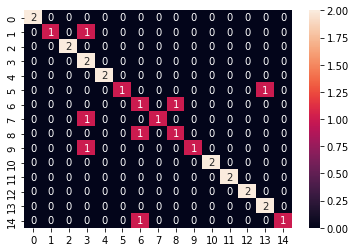

In [ ]:
import seaborn as sns 

sns.heatmap(cm, annot = True);